# MCMC

## Stellar inclination through MCMC

Here we'll use the approach suggested in [Masuda & Winn (2020)](https://ui.adsabs.harvard.edu/abs/2020AJ....159...81M/abstract) to infer the stellar inclination, $i_\star$, from measured values for the stellar rotation period, $P_{\rm rot}$, the stellar radius, $R_\star$, and the projected stellar rotation speed, $v \sin i_\star$.

We'll assume values of $P_{\rm rot}=90 \pm 5$ d, $R_\star=4.67 \pm 0.15$ R$_\odot$, and $v \sin i_\star = 0.0 \pm 0.9$ km/s.

In [1]:
import coPsi
## Instantiate iStar with values for Prot, Rs, and vsini
incs = coPsi.iStar(Rs=(4.67,0.25,1,7,'gauss'),
				   Prot=(90,5,0,150,'gauss'),
				   vsini=(0.0,0.9,0,12,'tgauss'))#Truncated gaussian for vsini to avoid negative values


Now we'll do an MCMC (using [emcee](https://emcee.readthedocs.io/en/stable/)) and output the results in a csv file it will also (by default) create a [corner](https://corner.readthedocs.io/en/latest/) plot and autocorrelation plot (for convergence).

Distributions not initilialized.
Calling iStar.createDistributions.
Number of draws is 20000.



 62%|██████▏   | 12400/20000 [01:18<00:48, 157.70it/s]


MCMC converged after 12400 iterations.


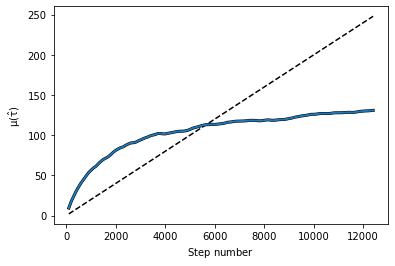

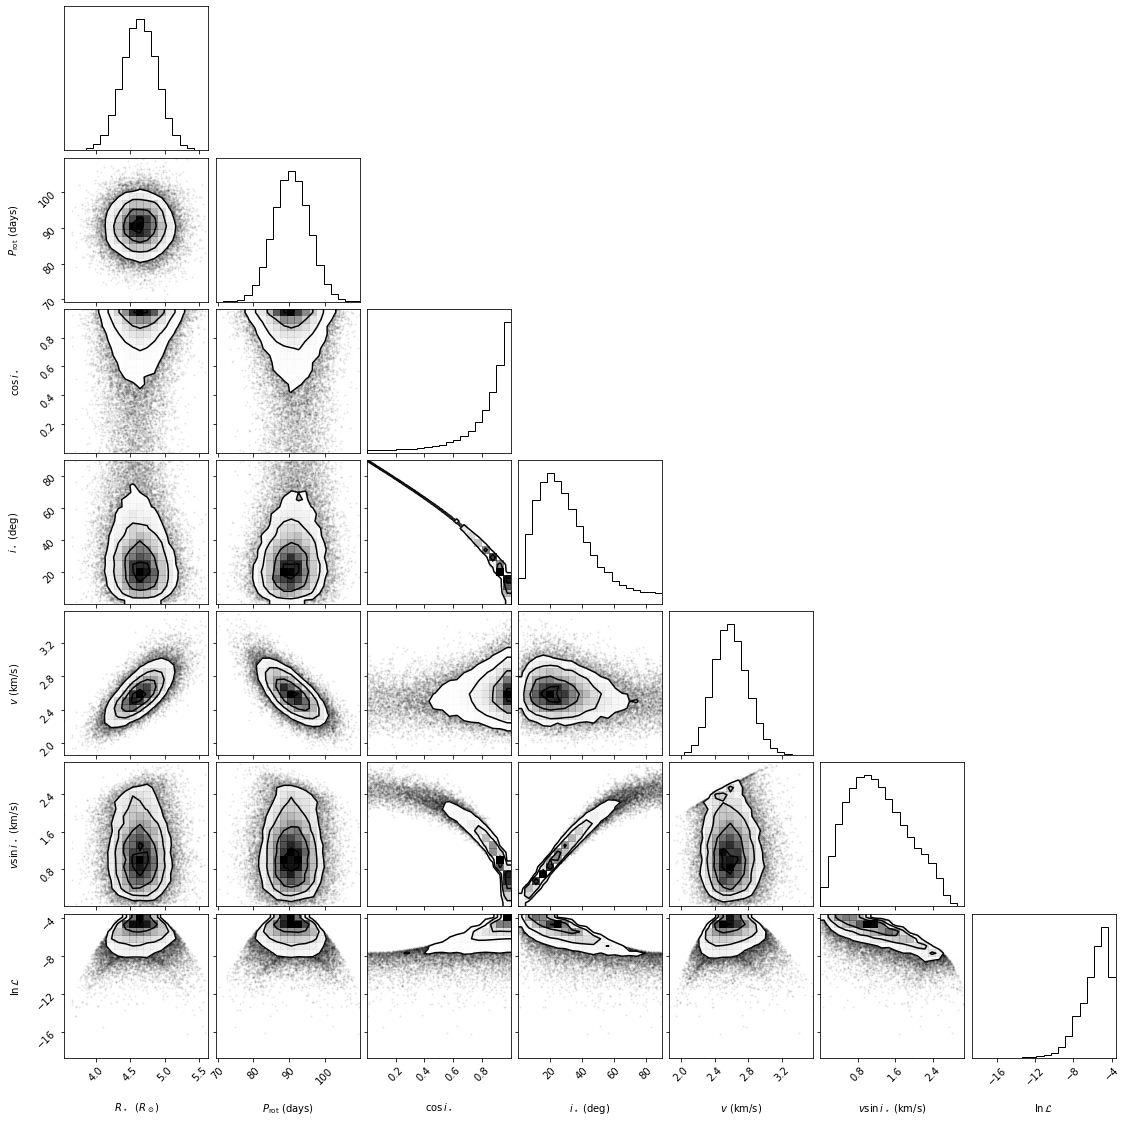

In [2]:
df = incs.stellarInclination(ndraws=20000,save_df=False,save_corner=False,save_convergence=False)

In [3]:
print(df)

  Parameter        Rs       Prot      cosi       incs         v     vsini
0    Median  4.636289  90.644448  0.890790  27.027314  2.584457  1.178060
1     Lower  0.247725   5.407868  0.109207  12.671386  0.186408  0.556233
2     Upper  0.252253   4.508299  0.081795  19.528407  0.209326  0.743832


As in the empirical example, if we have measures for the obliquity, $\lambda$, and the orbital inclination, $i_{\rm o}$, we can calculate the obliquity, $\psi$. Here we'll create distributions externally (which could have come from an MCMC), but they could also be created like before.

Median and confidence level (0.68 credibility):
psi=59.703+19.586-11.417


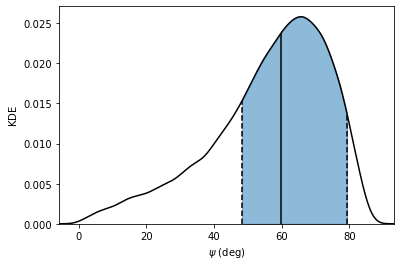

In [12]:
import numpy as np
## Let's say we also have distributions for lambda and the orbital inlination 
## of a length similar to the distributionk for the stellar inclination
## (here we'll simulate them)
incs.dist['lam'] = np.random.normal(10,10,len(incs.dist['incs']))
incs.dist['inco'] = np.random.normal(85.81,0.6,len(incs.dist['incs']))

## Now let's calculate the obliquity psi
incs.coPsi()
incs.diagnostics('psi')